In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2024-01-10 14:31:40.571930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0
2.10.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
from keras.callbacks import History


model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()
history = History()

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
print(mse_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
363/363 [==============================] - 1s 869us/step - loss: 515725104374611968.0000 - val_loss: 216111832367104.0000
Epoch 2/20
363/363 [==============================] - 0s 635us/step - loss: 114191620898816.0000 - val_loss: 50518479077376.0000
Epoch 3/20
363/363 [==============================] - 0s 642us/step - loss: 26693574066176.0000 - val_loss: 11809268432896.0000
Epoch 4/20
363/363 [==============================] - 0s 711us/s

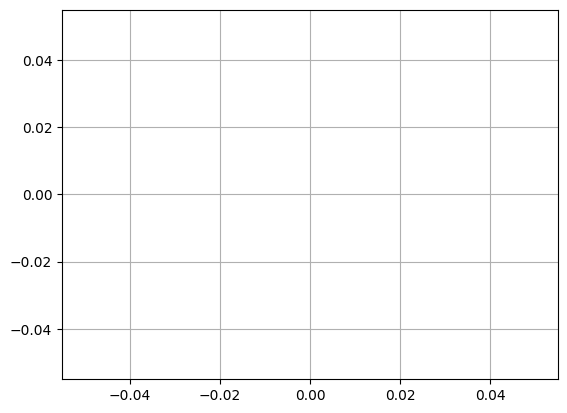

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()


# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_full)
scaler.transform(X_train_full)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

history1 = History()

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history1 = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test1 = model.evaluate(X_test, y_test)
X_new1 = X_test[:3]
y_pred1 = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 806us/step - loss: 2346487384514084860619390976.0000 - val_loss: 104428025600211419136.0000
Epoch 2/20
363/363 [==============================] - 0s 625us/step - loss: 7268411775366725632.0000 - val_loss: 44560302473216.0000
Epoch 3/20
363/363 [==============================] - 0s 628us/step - loss: 3101492772864.0000 - val_loss: 19014616.0000
Epoch 4/20
363/363 [==============================] - 0s 632us/step - loss: 1323429.1250 - val_loss: 9.7149
Epoch 5/20
363/363 [==============================] - 0s 629us/step - loss: 1.8970 - val_loss: 1.3160
Epoch 6/20
363/363 [==============================] - 0s 631us/step - loss: 1.3409 - val_loss: 1.3184
Epoch 7/20
363/363 [==============================] - 0s 631us/step - loss: 1.3408 - val_loss: 1.3165
Epoch 8/20
363/363 [==============================] - 0s 628us/step - loss: 1.3409 - val_loss: 1.3166
Epoch 9/20
363/363 [==============================] - 0s 625us/step - loss: 1.341

1/1 [==============================] - 0s 32ms/step


In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
score
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


1.3236311674118042

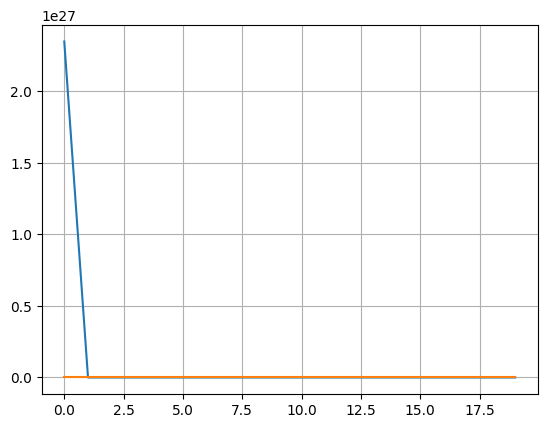

In [20]:
plt.plot(pd.DataFrame(history1.history))
plt.grid(True)
plt.show()


# Dane zawsze muszą być przeskalowane